<a href="https://colab.research.google.com/github/Diederickvanderlee/Tensorflow-Codelab/blob/master/diederickvanderlee_week3_Siraj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###import dependencies & data


In [0]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at drive


In [0]:
ccd_raw_df   =pd.read_csv("/train_identity.csv")
ccd_trans_df =pd.read_csv("/train_transaction.csv")

###Explore data

In [17]:
print("shape train identity ", ccd_raw_df.shape)
print(ccd_trans_df.shape)
print (ccd_trans_df.head())
print (ccd_raw_df.head())


shape train identity  (144233, 41)
(590540, 394)
   TransactionID  isFraud  TransactionDT  ...  V337 V338  V339
0        2987000        0          86400  ...   NaN  NaN   NaN
1        2987001        0          86401  ...   NaN  NaN   NaN
2        2987002        0          86469  ...   NaN  NaN   NaN
3        2987003        0          86499  ...   NaN  NaN   NaN
4        2987004        0          86506  ...   0.0  0.0   0.0

[5 rows x 394 columns]
   TransactionID  id_01  ...  DeviceType                     DeviceInfo
0        2987004    0.0  ...      mobile  SAMSUNG SM-G892A Build/NRD90M
1        2987008   -5.0  ...      mobile                     iOS Device
2        2987010   -5.0  ...     desktop                        Windows
3        2987011   -5.0  ...     desktop                            NaN
4        2987016    0.0  ...     desktop                          MacOS

[5 rows x 41 columns]


###Merge tables on TransactionID (smaller on larger!)

In [0]:
full_train_df = pd.merge(ccd_trans_df, ccd_raw_df,  on = 'TransactionID', how = 'left')

In [33]:
print(full_train_df.head())
print(full_train_df.shape)
pct_fraud = len(full_train_df[full_train_df["isFraud"]==1])/len(full_train_df)*100
print("%s %% of transactions is earmarked as fraudulent"%(pct_fraud,))

   TransactionID  isFraud  ...  DeviceType                     DeviceInfo
0        2987000        0  ...         NaN                            NaN
1        2987001        0  ...         NaN                            NaN
2        2987002        0  ...         NaN                            NaN
3        2987003        0  ...         NaN                            NaN
4        2987004        0  ...      mobile  SAMSUNG SM-G892A Build/NRD90M

[5 rows x 434 columns]
(590540, 434)
3.4990009144173126 % of transactions is earmarked as fraudulent


In [54]:
legitimate = full_train_df[full_train_df["isFraud"]==0]
fraudulent = full_train_df[full_train_df["isFraud"]==1]
q_legitimate = legitimate["TransactionAmt"]
q_fraudulent = fraudulent["TransactionAmt"]
mean_legit = q_legitimate.mean()
mean_fraud = q_fraudulent.mean()
std_legit = q_legitimate.std()
std_fraud = q_fraudulent.std()

print ("the mean legit is : %s, the mean fraud is: %s, \nTHe std legit is: %s, the std fraud is: %s"%(mean_legit, mean_fraud, std_legit, std_fraud))

the mean legit is : 134.51166457896034, the mean fraud is: 149.2447785897534, 
THe std legit is: 239.39507777152886, the std fraud is: 232.21216297086974


#Exploring data


###Checking fraudulent vs legitimate

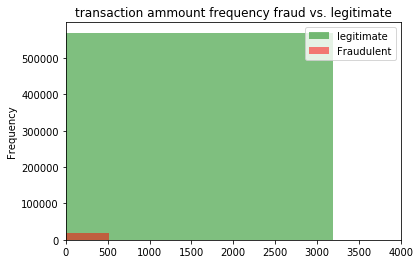

In [59]:
kwargs = dict(alpha=0.5, bins=10)

plt.hist(q_legitimate, **kwargs,  color='g', label='legitimate')
plt.hist(q_fraudulent, **kwargs,  color='r', label='Fraudulent')



plt.gca().set(title='transaction ammount frequency fraud vs. legitimate', ylabel='Frequency')
plt.xlim(0,4000)
plt.legend();

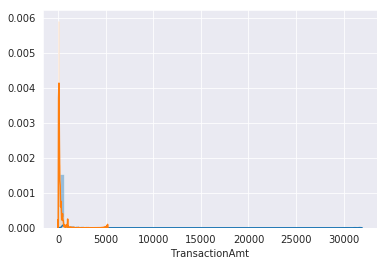

In [62]:
sns.set_style('darkgrid')
sns.distplot(q_legitimate)
sns.distplot(q_fraudulent)


# Data Prepocessing

###Dealing with missing values


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

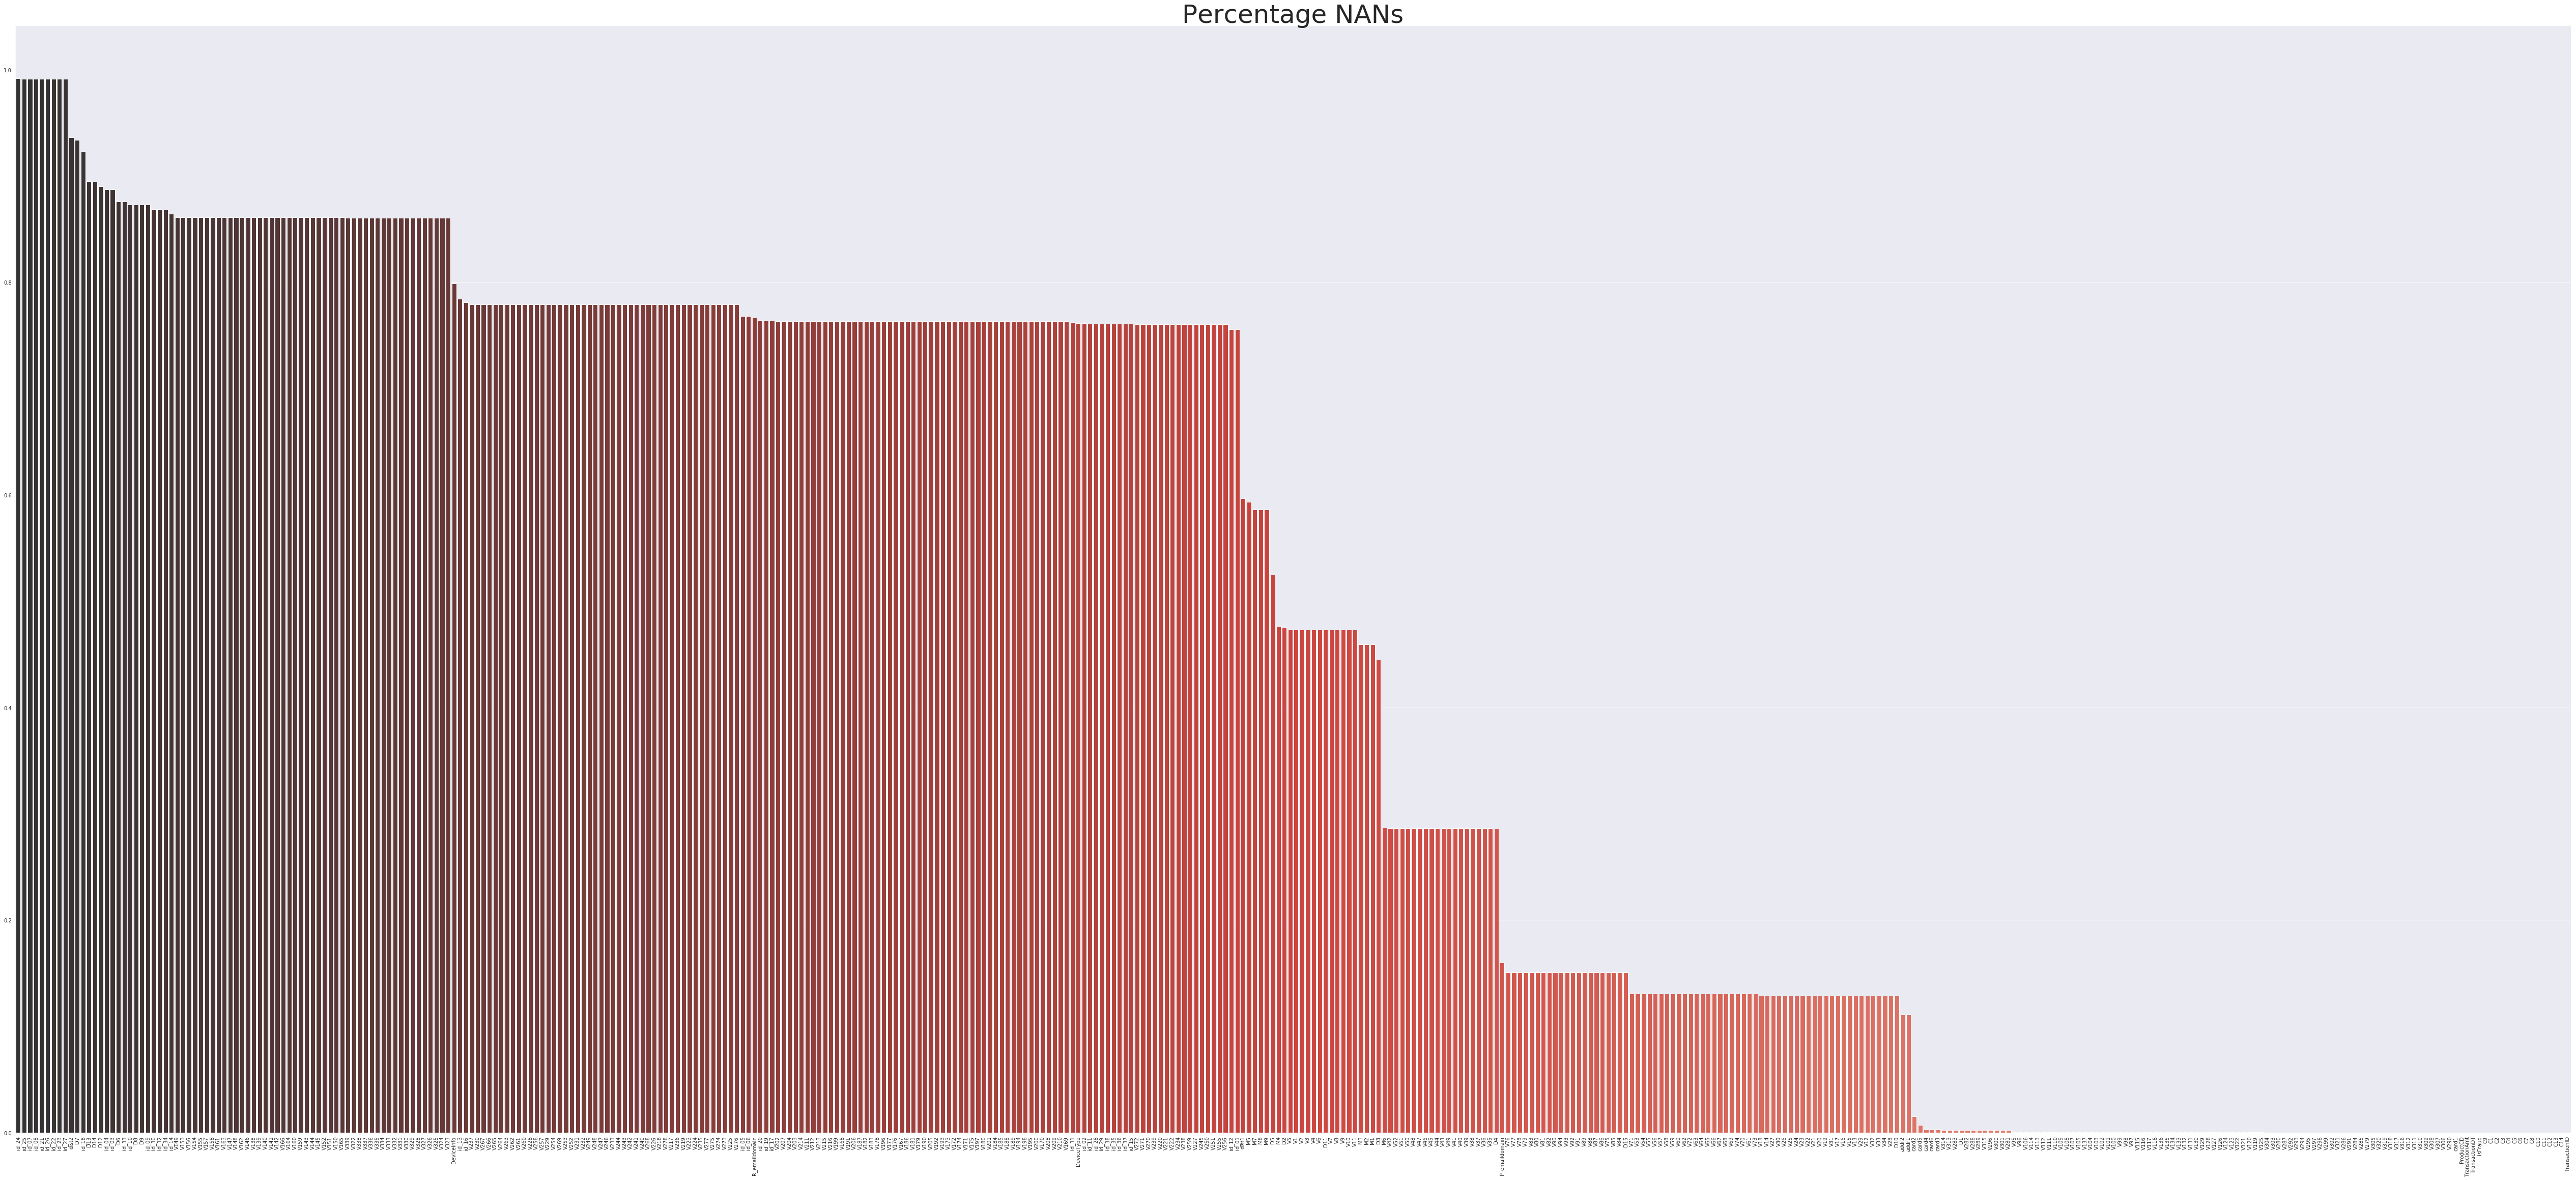

In [65]:

plt.figure(figsize=(90,40))
sns.barplot(y=full_train_df.isnull().sum().sort_values(ascending=False)/len(full_train_df),
            x=full_train_df.isnull().sum().sort_values(ascending=False).index,
            palette="Reds_d")
plt.title("Percentage NANs",size=50)
plt.xticks(rotation=90)

##Remove all columns that have too little information 

###Any columns that have more than 90% data available will remain. (missing values  <10%)

In [0]:
columns_def=pd.DataFrame({"na_count":full_train_df.isnull().sum().sort_values(ascending=False)})
columns_def["per"]=columns_def["na_count"]/len(full_train_df)

create column with percentages missing
then dropping those with a lower percentage than missing

In [0]:
range = [0.05, 0.1, 0.15, 0.25, 0.4, 0.6, 0.75]

### Bythe following loop will check how much of the data is left with i% missing values.


In [91]:
for i in range: 
    print ("for %s percentage missing values, %s percent of the data is left"%(i, columns_def[columns_def["per"]<i].shape[0]/full_train_df.shape[1]))

for 0.05 percentage missing values, 0.25806451612903225 percent of the data is left
for 0.1 percentage missing values, 0.25806451612903225 percent of the data is left
for 0.15 percentage missing values, 0.3686635944700461 percent of the data is left
for 0.25 percentage missing values, 0.41935483870967744 percent of the data is left
for 0.4 percentage missing values, 0.46543778801843316 percent of the data is left
for 0.6 percentage missing values, 0.5207373271889401 percent of the data is left
for 0.75 percentage missing values, 0.5207373271889401 percent of the data is left


10% seems alright arbitrarily


In [0]:
columns_final=columns_def[columns_def["per"]<limit].index 
limit=0.15
full_train_df=full_train_df[full_train_df.columns.intersection(columns_final)]


In [93]:
print(full_train_df.head())
print(full_train_df.shape)
pct_fraud2 = len(full_train_df[full_train_df["isFraud"]==1])/len(full_train_df)*100
print("%s %% of transactions is earmarked as fraudulent"%(pct_fraud2,))

   TransactionID  isFraud  TransactionDT  ...  V319 V320  V321
0        2987000        0          86400  ...   0.0  0.0   0.0
1        2987001        0          86401  ...   0.0  0.0   0.0
2        2987002        0          86469  ...   0.0  0.0   0.0
3        2987003        0          86499  ...   0.0  0.0   0.0
4        2987004        0          86506  ...   0.0  0.0   0.0

[5 rows x 112 columns]
(590540, 112)
3.4990009144173126 % of transactions is earmarked as fraudulent


##Playing with categorical variables

In [73]:
full_train_df[full_train_df.select_dtypes(include=['object']).columns]

,ProductCD,card4,card6
0,W,discover,credit
1,W,mastercard,credit
2,W,visa,debit
3,W,mastercard,debit
4,H,mastercard,credit
5,W,visa,debit
6,W,visa,debit
7,W,visa,debit
8,H,visa,debit
9,W,mastercard,debit


###Creating dummy values

Dealing with categories is arbitrary and difficult to deal with compuationally. dummies turns literal categories into numerical identifiers. (each object category will be turned in a boolean column)

In [97]:
card_dummy_df=pd.get_dummies(full_train_df["card6"])
full_train_df.shape

(590540, 112)

concatenate old dataframe with the newly created columns

In [0]:
full_train_df=pd.concat([full_train_df,card_dummy_df],axis=1)
full_train_df=full_train_df._get_numeric_data()
full_train_df=full_train_df.dropna()


In [105]:
print(full_train_df.shape)
pct_fraud = len(full_train_df[full_train_df["isFraud"]==1])/len(full_train_df)*100
print("%s %% of transactions is earmarked as fraudulent"%(pct_fraud))

(578090, 113)
3.46278261170406 % of transactions is earmarked as fraudulent


# Splitting training and testing data


In [0]:
x_full_df = full_train_df.drop(["isFraud"], axis=1)
y_full_df = full_train_df["isFraud"]
X_train,X_test,y_train,y_test=train_test_split(x_full_df,y_full_df,test_size=0.30)


#Creating Models

create logistic regression model

In [108]:
lr = LogisticRegression(solver= 'lbfgs')
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [110]:
print("Logistic regression is able to predict fraudulent behavior with %s percent accuracy"%lr.score(X_test, y_test))

Logistic regression is able to predict fradulent behavior with 0.9649189572557906 percent accuracy


### Make a confusion table to analyse how good the prediction action was wat catchin frauds 

In [112]:
y_pred = lr.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=["True"], colnames = ['Pedicted'], margins=True)

Pedicted,0,All
True,,
0,167343,167343
1,6084,6084
All,173427,173427


###Recall score gives actual positive prediction accuracy


In [113]:
recall_score(y_test, y_pred)

0.0

##Recall is more important than prediction accuracy!!

#conclusion : LR is not good at predicting Fraud
